#  Teleco-Customer-Churn


Import the Excel file as a data frame and required libraries for analysis // to startof with pandas ,numy and matplotlib


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
file_path = '/content/Telco-Customer-Churn.xlsx'#define excel path
df = pd.read_excel(file_path)#read as assign excel to dataframe df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Now we have clean the data by removing unusable fields like null refs

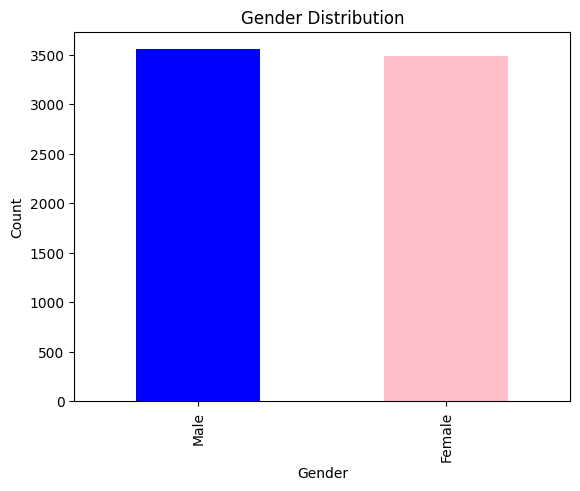

In [ ]:
#Show gender ratio using a bar chart or histogram
# Count the occurrences of each gender category
gender_counts = df['gender'].value_counts()
# Define colors for each gender category
colors = ['blue', 'pink']

# Plot the bar graph with custom colors
gender_counts.plot(kind='bar', color=colors)

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')

# Display the plot
plt.show()

Thus The gender ratio is similar

# Create Box Plot for Telecom Churn

In [ ]:
#Assign the sorted array based on tenure to new daraframe so orginal data is conserved
sorted_df=df.sort_values(by="tenure")
sorted_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 1340 to 3543
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   objec

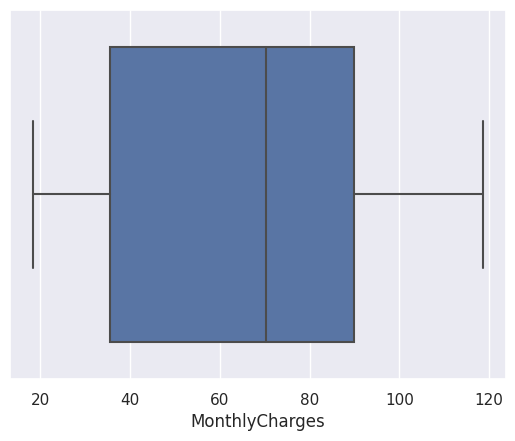

In [ ]:
#there are no null fields in the data, box plot of monthly charges
sns.boxplot(x = 'MonthlyCharges', data = sorted_df);

Monthly Charges seem to have no outliers almost symetrical

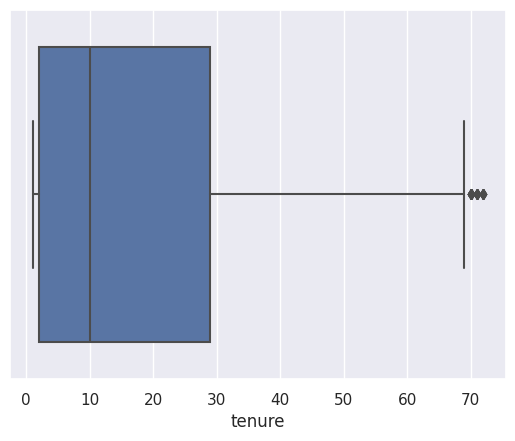

In [ ]:
#Box plot of tenure for user who churned
df_churned=df[df['Churn']=="Yes"]
sns.boxplot(x = 'tenure', data = df_churned);

Right skewed box plot , positively skewed

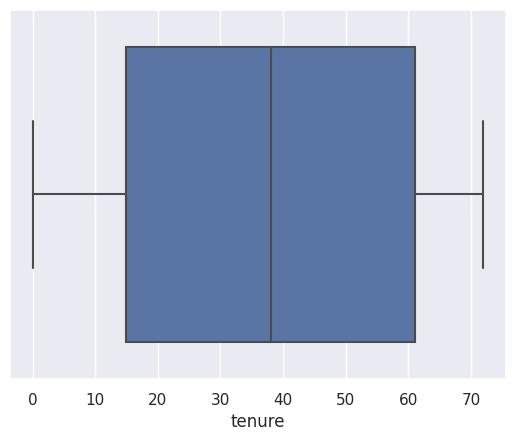

In [ ]:
#Box plot of tenure for user who retianed provider
df1_churned=df[df['Churn']=="No"]
sns.boxplot(x = 'tenure', data = df1_churned);

Symetrical box plot





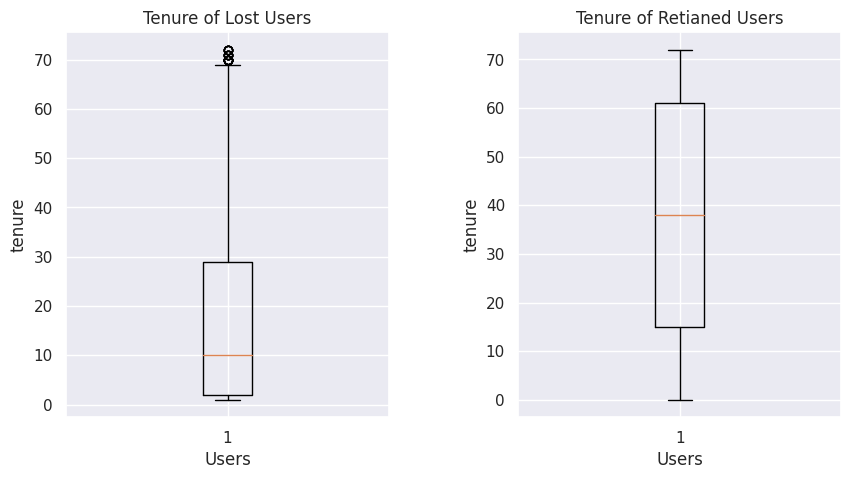

In [ ]:
#Compare various plots in the same graph
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
# Plot the box plot for Lost users
ax1.boxplot(df_churned['tenure'])
ax1.set_xlabel('Users')
ax1.set_ylabel('tenure')
ax1.set_title('Tenure of Lost Users')

# Plot the box plot for Retianed
ax2.boxplot(df1_churned['tenure'])
ax2.set_xlabel('Users')
ax2.set_ylabel('tenure')
ax2.set_title('Tenure of Retianed Users')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4)

# Display the plot
plt.show()


# MonthlyCharges Based Comparison


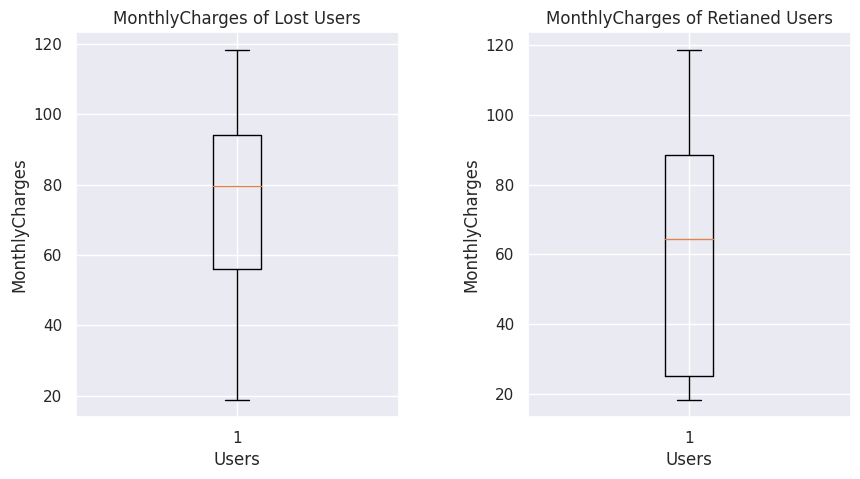

In [ ]:
#Compare various plots in the same graph
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
# Plot the box plot for Lost users
ax1.boxplot(df_churned['MonthlyCharges'])
ax1.set_xlabel('Users')
ax1.set_ylabel('MonthlyCharges')
ax1.set_title('MonthlyCharges of Lost Users')

# Plot the box plot for Retianed
ax2.boxplot(df1_churned['MonthlyCharges'])
ax2.set_xlabel('Users')
ax2.set_ylabel('MonthlyCharges')
ax2.set_title('MonthlyCharges of Retianed Users')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4)

# Display the plot
plt.show()


# Taking into consideration the Users that were Lost
<!-- Since the users who were already lost cant be retianed so identify what worked for users that were retianed and identify the pattern that will help them going forward -->

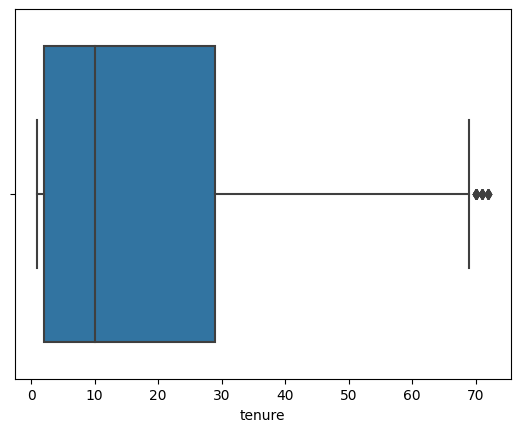

In [3]:
df_churned_Users=df[df['Churn']=="Yes"]
sns.boxplot(x = 'tenure', data = df_churned_Users);

<ipython-input-4-36d96a1c2bb4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_churned_Users.loc[:, 'TotalCharges'] = df_churned_Users['TotalCharges'].astype(float)
<ipython-input-4-36d96a1c2bb4>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_churned_Users.loc[:, 'TotalCharges'] = df_churned_Users['TotalCharges'].astype(float)


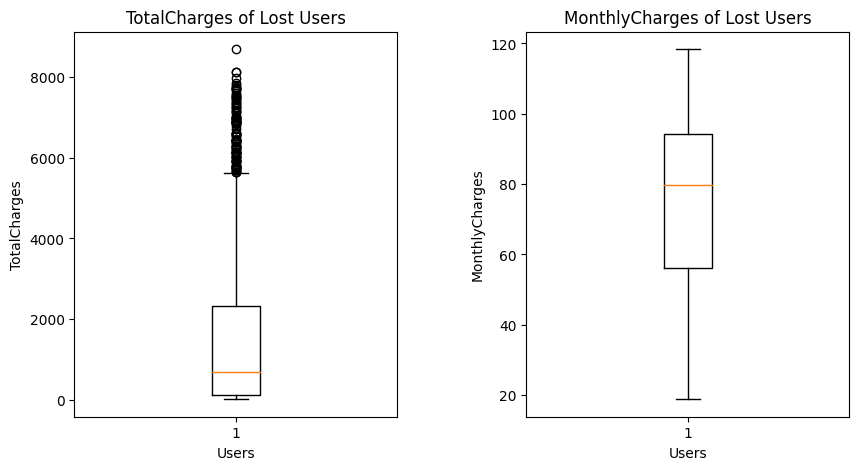

In [4]:
df_churned_Users.loc[:, 'TotalCharges'] = df_churned_Users['TotalCharges'].astype(float)


# df_churned.loc[:, 'TotalCharges'] = df_churned['TotalCharges'].astype(float)

#Compare various plots in the same graph
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
# Plot the box plot for Lost users
ax1.boxplot(df_churned_Users['TotalCharges'])
ax1.set_xlabel('Users')
ax1.set_ylabel('TotalCharges')
ax1.set_title('TotalCharges of Lost Users')



# Plot the box plot for Lost
ax2.boxplot(df_churned_Users['MonthlyCharges'])
ax2.set_xlabel('Users')
ax2.set_ylabel('MonthlyCharges')
ax2.set_title('MonthlyCharges of Lost Users')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4)

# Display the plot
plt.show()




Define a function that plots box plot of the services used by the user so we dont have to repeat the same set of lines again and again

In [5]:

#Func to plot bar graph based of category
def plot_graph_based_on_category(df_data, category_column):

    # Check if the specified column exists in the DataFrame
    if category_column not in df_data.columns:
        print(f"Error: Column '{category_column}' not found in the DataFrame.")
        return

   # Filter the DataFrame to get only "yes" and "no" entries
    filtered_df = df_data[df_data[category_column].isin(["Yes", "No"])]

    # Calculate the counts of "yes" and "no" values for the specified category
    counts = filtered_df[category_column].value_counts()

    # Create a bar plot
    plt.bar(counts.index, counts.values,color=["blue","red"])

    # Add labels and title
    plt.xlabel("category_column")
    plt.ylabel("Counts")
    plt.title(f"Yes/No Counts in '{category_column}'")

    # Show the plot
    plt.show()

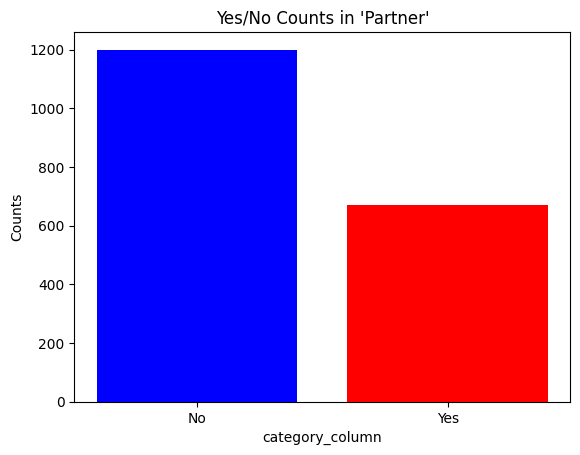

In [ ]:
#Partner
plot_graph_based_on_category(df_churned_Users,"Partner")

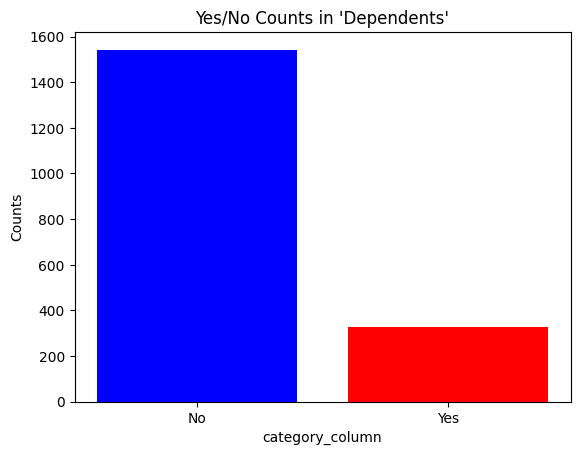

In [ ]:
#Dependents
plot_graph_based_on_category(df_churned_Users,"Dependents")

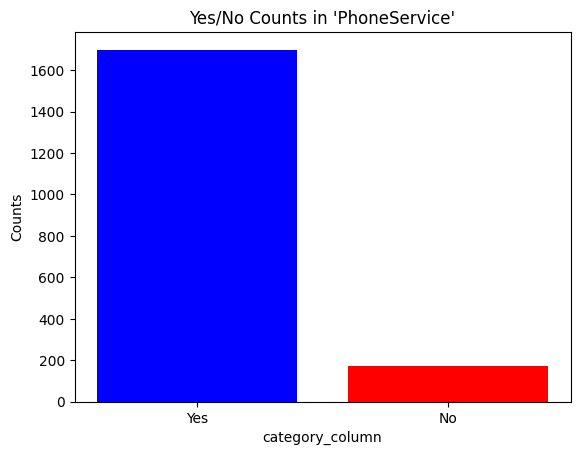

In [ ]:
#PhoneService

plot_graph_based_on_category(df_churned_Users,"PhoneService")

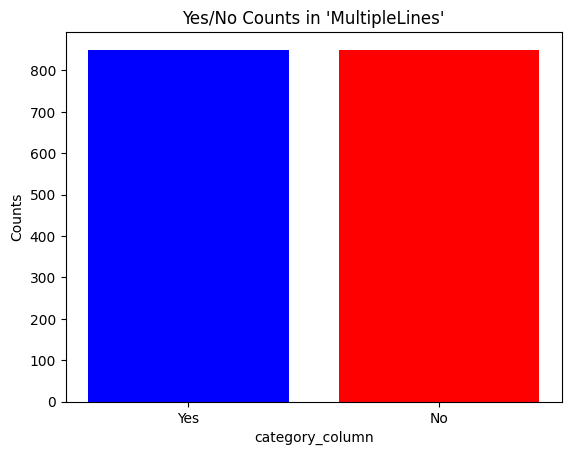

In [ ]:
#MultipleLines

plot_graph_based_on_category(df_churned_Users,"MultipleLines")

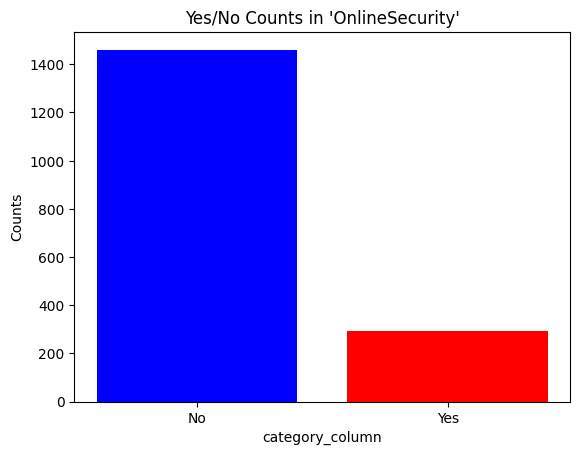

In [ ]:
#OnlineSecurity
plot_graph_based_on_category(df_churned_Users,"OnlineSecurity")

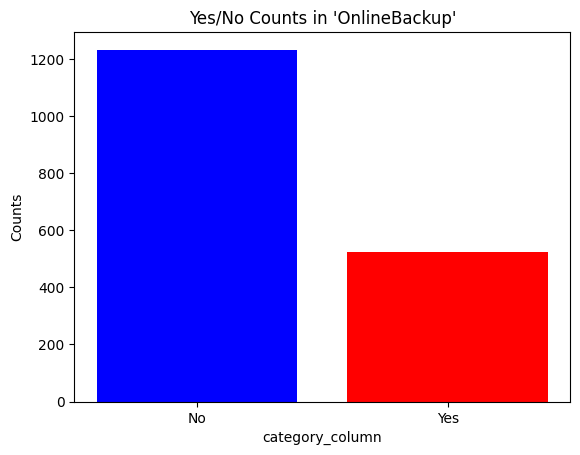

In [ ]:
#OnlineBackup
plot_graph_based_on_category(df_churned_Users,"OnlineBackup")

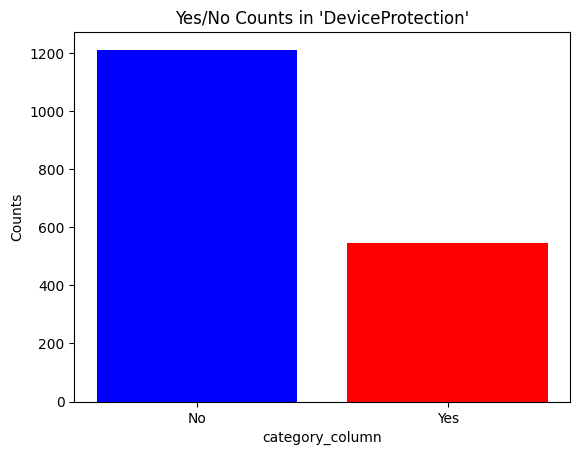

In [ ]:
#DeviceProtection
plot_graph_based_on_category(df_churned_Users,"DeviceProtection")

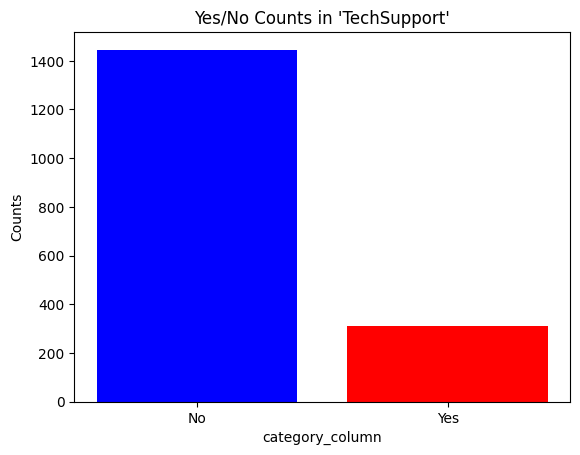

In [ ]:
#TechSupport
plot_graph_based_on_category(df_churned_Users,"TechSupport")

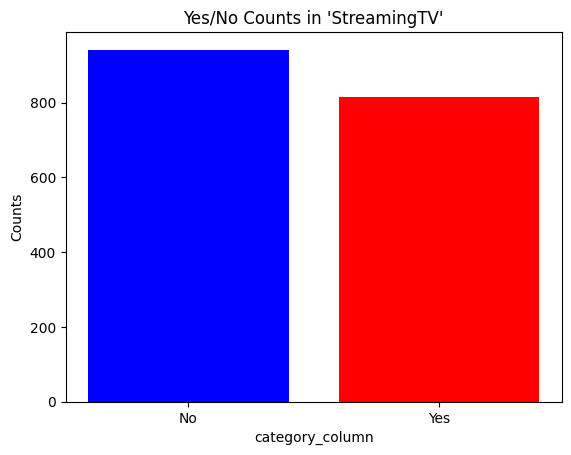

In [ ]:
#StreamingTV
plot_graph_based_on_category(df_churned_Users,"StreamingTV")

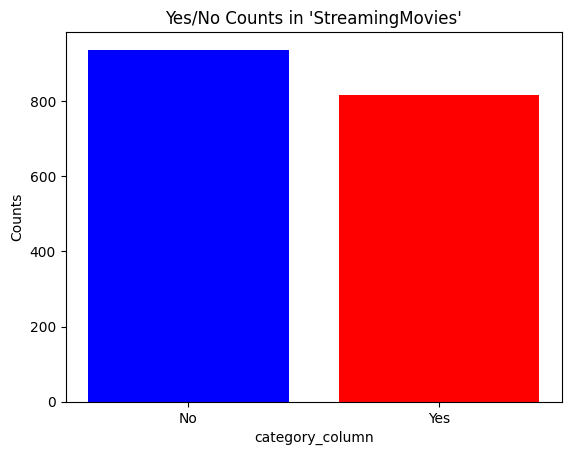

In [ ]:
#StreamingMovies
plot_graph_based_on_category(df_churned_Users,"StreamingMovies")

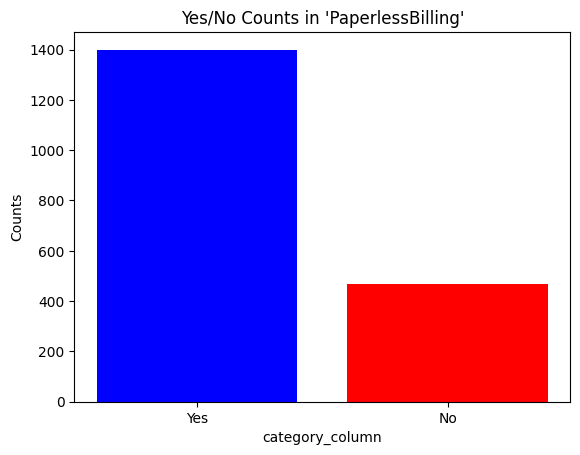

In [ ]:
#PaperlessBilling
plot_graph_based_on_category(df_churned_Users,"PaperlessBilling")

From the above bar graphs we can get an idea of which services the retianed users have used more.

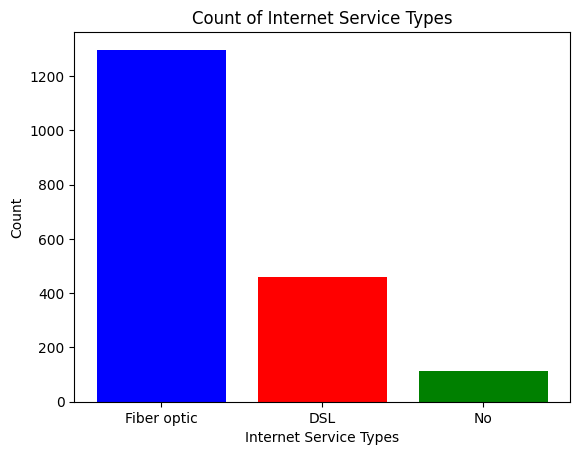

In [9]:
# Count the occurrences of each internet service type
service_counts = df_churned_Users["InternetService"].value_counts()

# Create a bar plot
plt.bar(service_counts.index, service_counts.values,color=["blue","red","green"])

# Add labels and title
plt.xlabel("Internet Service Types")
plt.ylabel("Count")
plt.title("Count of Internet Service Types")

# Show the plot
plt.show()

# Retianed Users

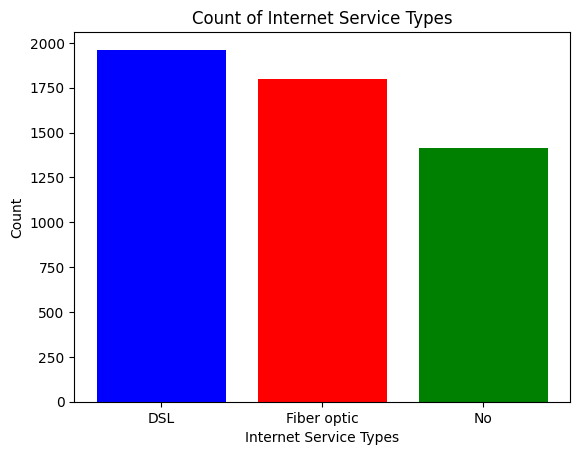

In [10]:
df_retianed_Users=df[df['Churn']=="No"]
# Count the occurrences of each internet service type
service_counts = df_retianed_Users["InternetService"].value_counts()

# Create a bar plot
plt.bar(service_counts.index, service_counts.values,color=["blue","red","green"])

# Add labels and title
plt.xlabel("Internet Service Types")
plt.ylabel("Count")
plt.title("Count of Internet Service Types")

# Show the plot
plt.show()

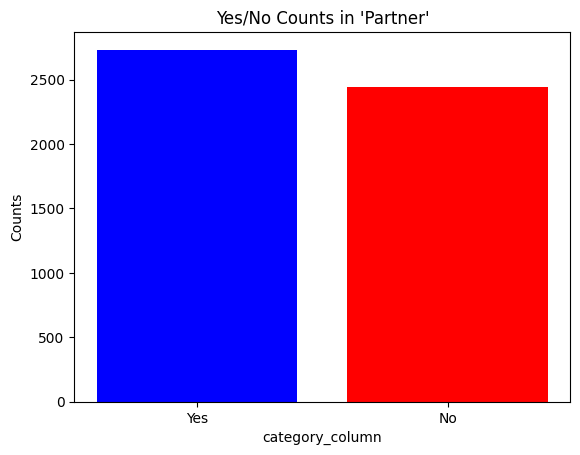

In [11]:
#Partner
plot_graph_based_on_category(df_retianed_Users,"Partner")

# Compare the Graphs to Get to a conclusion

In [17]:
#Func to Compare 2 plots

def plot_compare_graph_based_on_category(df_data1, df_data2, category_column):
    # Check if the specified column exists in both DataFrames
    if category_column not in df_data1.columns or category_column not in df_data2.columns:
        print(f"Error: Column '{category_column}' not found in both DataFrames.")
        return

    # Filter the DataFrames to get only "yes" and "no" entries for the specified category
    filtered_df1 = df_data1[df_data1[category_column].isin(["Yes", "No"])]
    filtered_df2 = df_data2[df_data2[category_column].isin(["Yes", "No"])]

    # Calculate the counts of "yes" and "no" values for the specified category in both DataFrames
    counts1 = filtered_df1[category_column].value_counts()
    counts2 = filtered_df2[category_column].value_counts()

    # Create a bar plot
    width = 0.3  # Reduced width for the bars
    x = np.arange(len(counts1.index))
    plt.bar(x - width/2, counts1.values, width=width, color="blue", label="ChurnedUsers")
    plt.bar(x + width/2, counts2.values, width=width, color="red", label="RetianedUsers", alpha=0.7)

    # Add labels and title
    plt.xlabel(category_column)
    plt.ylabel("Counts")
    plt.title(f"Yes/No Counts in '{category_column}' - Comparative View")
    plt.xticks(x, counts1.index)  # Use the same x-axis ticks for both DataFrames
    plt.legend()

    # Show the plot
    plt.show()




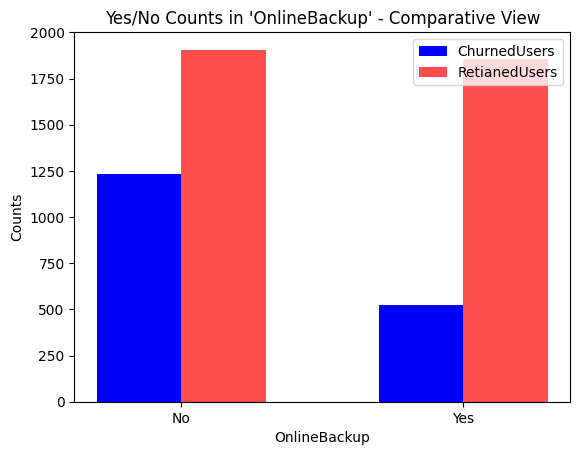

In [18]:
plot_compare_graph_based_on_category(df_churned_Users,df_retianed_Users,"OnlineBackup")

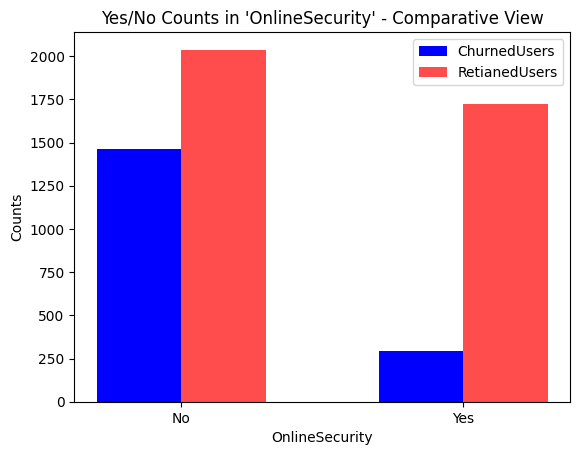

In [19]:
plot_compare_graph_based_on_category(df_churned_Users,df_retianed_Users,"OnlineSecurity")